# Assignment 2 - Classification of Business Reviews

**Submission deadline: Friday 27 April 2018, 11pm**

**Penalty for late submission: 4 marks per day**

**Assessment marks: 20 marks (20% of the total unit assessment)**

**Conor Apcar - 4462 4336**

The following code reads business reviews which are part of the [Yelp Dataset stored in Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset). The data are stored in a CSV file. The following code reads the CSV file and prints the contents of the first 5 records:

In [1]:
import pandas as pd
pd_data = pd.read_csv('yelp_review.zip')
pd_data[:5]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


From the data, we will only use the reviews and the star rating. The following code extracts this information and places it in a list of pairs:

In [2]:
all_data = list(zip(pd_data['text'], pd_data['stars']))

In [3]:
len(all_data)

5261668

In [4]:
all_data[:5]

[("Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly.",
  5),
 ("Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.",
  5),
 ("Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the insi

Let's now check the distribution of star ratings:

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
from collections import Counter
c = Counter([rating for text, rating in all_data])
c

Counter({1: 731363, 2: 438161, 3: 615481, 4: 1223316, 5: 2253347})

<Container object of 5 artists>

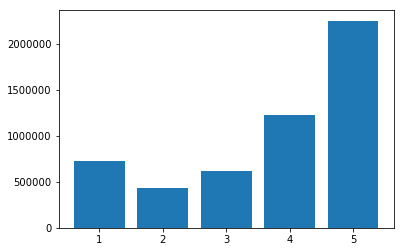

In [7]:
plt.bar(range(1,6), [c[1], c[2], c[3], c[4], c[5]])

**In this assignment you will predict whether a particular review gives 5 stars or not.**

The data set is fairly large with more than 5 million samples. To speed up the computations for this assigmnent, we will use 500,000 samples for training,  10,000 for the dev-test set and 10,000 for the test set. To reduce any possible bias while partitioning the data set, we will first shuffle the data and then partition into training data, dev-test data, and test data using the following code:

In [8]:
import random
random.seed(1234)
random.shuffle(all_data)
train_data, devtest_data, test_data = all_data[:500000], all_data[500000:510000], all_data[510000:520000]

## Exercise 1 (1 mark)
The data are annotated with a star rating. In this assignment we will attempt to predict whether the review has 5 stars or not. In other words, we will use two categories: "it does not have 5 stars", and "it has 5 stars". According to these categories, check that the training data, devtest data and test data have the same proportions of the categories "it does not have 5 stars", and "it has 5 stars".

In [9]:
from collections import Counter

In [10]:
# Replaces all the ratings with the two categories
train = [(w, "it does not have 5 stars") if r < 5 else (w, "it has 5 stars") for w,r in train_data]
# Counts the amount of each category
trainCount = Counter([r for w,r in train])
print("Train Count")
print(trainCount)

print()
devtest = [(w, "it does not have 5 stars") if r < 5 else (w, "it has 5 stars") for w,r in devtest_data]
devtestCount = Counter([r for w,r in devtest])
print("Devtest Count")
print(devtestCount)

print()
test = [(w, "it does not have 5 stars") if r < 5 else (w, "it has 5 stars") for w,r in test_data]
testCount = Counter([r for w,r in test])
print("Test Count")
print(testCount)

Train Count
Counter({'it does not have 5 stars': 285795, 'it has 5 stars': 214205})

Devtest Count
Counter({'it does not have 5 stars': 5725, 'it has 5 stars': 4275})

Test Count
Counter({'it does not have 5 stars': 5676, 'it has 5 stars': 4324})


#### Train Set: 
approximately 57.15% of the training data does not have 5 stars.
#### Devtest Set:
approximately 57.25% of the dev test data does not have 5 stars.
#### Test Set:
approximately 56.76% of the test data does not have 5 stars.

Based on these perecentages, it does seem that the data across three sets are all well proportioned and have an even amount of data.

## Exercise 2 (2 marks)
Use sklearn to generate the tf.idf matrix of the training set. With this matrix, train an sklearn Naive Bayes classifier using the training set and report the F1 scores of the training set, the devtest set, and the test set.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Creates the tfidf fitted with the training set
tfidf = TfidfVectorizer(input='contents', stop_words='english', max_features = 2000)
tfidf_train = tfidf.fit_transform([w for w, r in train])
tfidf_devtest = tfidf.transform([w for w, r in devtest])
tfidf_test = tfidf.transform([w for w, r in test])

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
# Create a naive bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, [r for w,r in train])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
from sklearn.metrics import classification_report

In [16]:
# Prints a report containing acurracy and f1 scores of the data set based on the naive bayes classifier
print("Train Set")
print(classification_report([r for w,r in train], nb_classifier.predict(tfidf_train)))

print()
print("Devtest Set")
print(classification_report([r for w,r in devtest], nb_classifier.predict(tfidf_devtest)))

print()
print("Test Set")
print(classification_report([r for w,r in test], nb_classifier.predict(tfidf_test)))

Train Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.78      0.88      0.83    285795
          it has 5 stars       0.81      0.67      0.73    214205

             avg / total       0.79      0.79      0.79    500000


Devtest Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.78      0.88      0.83      5725
          it has 5 stars       0.81      0.66      0.73      4275

             avg / total       0.79      0.79      0.79     10000


Test Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.78      0.88      0.83      5676
          it has 5 stars       0.82      0.67      0.74      4324

             avg / total       0.79      0.79      0.79     10000



#### Train Set:
f1-score = 0.79
#### Devtest Set:
f1-score = 0.79
#### Test Set:
f1-score = 0.79

## Exercise 3 (2 marks)
Logistic regression normally produces better results than Naive Bayes but it takes longer time to train. Look at the [documentation of sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and train a logistic regression classifier using the same tfidf information as in exercise 2. Report the F1 scores of the training set, the devtest set, and the test set.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Creates a logistic regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(tfidf_train, [r for w, r in train])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Prints a report containing acurracy and f1 scores of the data set based on the logistic regression classifier
print("Train Set")
print(classification_report([r for w,r in train], lr_classifier.predict(tfidf_train)))

print()
print("Devtest Set")
print(classification_report([r for w,r in devtest], lr_classifier.predict(tfidf_devtest)))

print()
print("Test Set")
print(classification_report([r for w,r in test], lr_classifier.predict(tfidf_test)))

Train Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.83      0.85      0.84    285795
          it has 5 stars       0.80      0.77      0.78    214205

             avg / total       0.82      0.82      0.82    500000


Devtest Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.83      0.85      0.84      5725
          it has 5 stars       0.79      0.77      0.78      4275

             avg / total       0.81      0.81      0.81     10000


Test Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.83      0.85      0.84      5676
          it has 5 stars       0.80      0.77      0.78      4324

             avg / total       0.82      0.82      0.82     10000



#### Train Set:
f1-score = 0.82
#### Devtest Set:
f1-score = 0.81
#### Test Set:
f1-score = 0.82

## Exercise 4 (4 marks)
Given the results obtained in the previous exercises, answer the following questions. You must justify all answers.
1. (1 mark) How much overfitting did you observe in the classifiers?
2. (1 mark) What would you do to reduce overfitting?
3. (1 mark) Which classifier is better?
4. (1 mark) What can you conclude from the differences in the results between the dev-test set and the test set?

(write your answer here using [Markdown formatting](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html))

### Question 1
The accuracy and f1-scores across the training, devtest, and test sets are all fairly similar in the naive bayes classfier. for the f1-scores, training = 0.79, devtest = 0.79, and test = 0.79. This indicates that there is no over-fitting across the data.

The logistic regression classifer also indicates that there is no over-fitting since we observe that the f1-scores are all similar as well, with training = 0.82, devtest = 0.81, and test = 0.82.

### Question 2
There are many steps you can take to reduce over-fitting. These include:

Cross-validation: Where you take your train set and parition it into k subsets, and tune your model.

Add More Data: Can help improve the accuracy but adding too much data can turn into noise that will not help your model

Remove features: Having too many features can create a problem, so it can help to remove some features and only keep the most relevant ones.
 

### Question 3
The logistic regression classifier seems to be marginally better than the naive bayes, with all f1-scores for the logistic regression classifer being slightly greater than 0.8, whilst all the f1-scores for the naive bayes classifer is slightly below 0.8.

### Question 4
The devtest and test sets are both very similar, and show no obvious differences. Both contain data selected randomly from the same data set, and are the same size, so it's not suprising that they are so similar.

## Exercise 5 (2 marks)
Write code that counts the false positives and false negatives of the training set of each classifier. What can you conclude from such counts?

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
# Get a confusion matrix of the predictions to see true and false predictions
nb_matrix = confusion_matrix([r for w,r in train], nb_classifier.predict(tfidf_train))
print("Naive Bayes")
print(nb_matrix)
print()
# Find the false positives and false negatives in the matrix
print("False Positive: " + str(nb_matrix[0][1]))
print("False Negative: " + str(nb_matrix[1][0]))

print()
lr_matrix = confusion_matrix([r for w,r in train], lr_classifier.predict(tfidf_train))
print("Logistic Regression")
print(lr_matrix)
print()
print("False Positive: " + str(lr_matrix[0][1]))
print("False Negative: " + str(lr_matrix[1][0]))

Naive Bayes
[[252008  33787]
 [ 71435 142770]]

False Positive: 33787
False Negative: 71435

Logistic Regression
[[243375  42420]
 [ 48544 165661]]

False Positive: 42420
False Negative: 48544


Reference of positions on the matrix: (0,0 = True Negative) (1,0 = False Negative) (0,1 = False Positive) (1,1 = True Positive)

There are more false values overall in the naive bayes classifier than in the logistic regression. This further validates the claim that the logistic regression classifier was slightly more accurate as shown by the f1_scores.

Also Being able to see the Amount of Data that is 'true' allows us to check the percentage that are predicted correctly, and compare it to the f1-scores and accuracy. For example in the naive bayes classifier:

142,770 + 252,008 = 394778
394,778/500,000 = 0.79

the 0.79 matches the accuracy in the train set naive bayes classifier 

## Exercise 6 (9 marks) - Improve the System and Final Analysis
This exercise is open ended. Your goal is to perform a more detailed error analysis and identify ways to improve the classification of reviews **by adding or changing the features**. To obtain top marks in this part, your answer must address all of the following topics:

1. An error analysis of the previous systems.
2. Based on the error analysis, explain what sort of modifications you would want to implement, and justify why these would be useful modifications.
3. Implementation of the improved classifier.
4. Evaluation of the results and comparison with the previous classifiers. What system is best and why?
5. Explain what further changes would possibly improve the classifier and why.

All this information should be inserted in this notebook below this question. The information should be structured in sections and it must be clear and precise. The explanations should be convincing. Below is a possible list of section headings. These sections are just a guideline. Feel free to change them, but make sure that they are informative and relevant.

** Note that, even if the new system might not obtain better results than the previous systems, you can obtain top marks if you perform a good error analysis of the initial systems and the final system and you give a sensible justification of the decisions that led you to implement the new system. Similarly, you may not obtain top marks if you present a system that improves on the results but you do not provide a good error analysis or you do not justify your choice of new system. **

### 1. Error Analysis

In [22]:
from sklearn.metrics import accuracy_score
import nltk

In [23]:
print("Accuracy of dev-test set:", accuracy_score([r for w, r in devtest], nb_classifier.predict(tfidf_devtest)))
errors = []
correct = []
# Check if the prediction is right or not and sort into lists accordingly
for w, r in devtest:
    guess = nb_classifier.predict(tfidf.transform([w]))
    # Go through and check each individual review if it equals it's original category
    if guess != r:
        errors.append((r, guess, w))
    else:
        correct.append((r, guess, w))
print("number of errors: ", len(errors))
print("number of correct: ", len(correct))

Accuracy of dev-test set: 0.7889
number of errors:  2111
number of correct:  7889


Went Through the naives bayes classifer on the devtest and stored all the errors in a new list. Also store the correct ones in a list as it used later on.

In [24]:
print("5 Star Reviews mislabelled")
print()
for (r, guess, w) in errors[:50]:
    if r == "it has 5 stars":
        print("correct = ", r) 
        print("guess = ", guess)
        print("text = ", w)
        print()

5 Star Reviews mislabelled

correct =  it has 5 stars
guess =  ['it does not have 5 stars']
text =  Visited Monday 11\/9 because I had won a $20 gift certificate in a golf tournament.  Not knowing anything about the place, we were pleasantly surprised at the cleanliness of the bar\/restaurant.  There were a few people out on the patio (smokers, kind of a turnoff) but we were planning on sitting inside anyhow.  The bartender\/waitress was very friendly and attentive, which is always good!  We split a personal pizza, a salad and a Philly cheese steak sandwich. We got the thin crust pizza and I highly recommend you try it and it was cooked perfectly.  The Philly had a heap of meat on it and the roll it was served on was fresh and just really good.  The salad was also very fresh and they have really good Ranch dressing (and I am a Ranch snob!)  So, I would say this is better than just "bar food" it seems to be teetering on fresh ingredients and someone in the back does care about what they

Firstly, had a look through some of the reviews that had been mislabelled. I started with the 5 star reviews that had been wrongly labelled. Reading through some of these reviews, I noticed that the language isn't strongly positive. A lot of them describing the events that occured during there time at the restraunt or hotel and so on. This would make it difficult for the classifier to determine that it is 5 stars, as there is not enough words describing how good it is, but more neutral language describing what happened in general.

In [25]:
print("not 5 Star Reviews mislabelled")
print()
for (r, guess, w) in errors[:50]:
    if r == "it does not have 5 stars":
        print("correct = ", r) 
        print("guess = ", guess)
        print("text = ", w)
        print()

not 5 Star Reviews mislabelled

correct =  it does not have 5 stars
guess =  ['it has 5 stars']
text =  Fast, clean and gorgeous work done by friendly staff. If I lived in town, this would be my spot.

correct =  it does not have 5 stars
guess =  ['it has 5 stars']
text =  My husband and I found this place through Groupon and are very glad we did!  We ordered some of the chef special rolls and they were phenomenal!  Really good.  Portions were big without overloading with rice!  We'll definately be going back!

correct =  it does not have 5 stars
guess =  ['it has 5 stars']
text =  Stopped in today for the first time on a walk to the library. We got there late in the afternoon and all of the daily flavors were gone except for the toasted almond crunch. The cupcake was flavorful and moist with a cream frosting, topped with shaved toasted almonds. Definite flavor explosion from the first bite to the last. I only wish we had gotten there earlier to try some of the others. The owner is ver

the non 5 star reviews that were mislabelled seem to suffer from a different problem. At first glance looking through some of these reviews, all of them are really short. There simply isn't enough data in the review to get a good idea of whether it's a 5 star review or not. The reviews either seem to be obviously negative when you read them, but the classifier can't determine that with the amount of data it's given. Otherwise, these short reviews seem to be filled with positive reviews, making it seem super positive and giving the impression that it is a 5 star review. 

I decided to look deeper into the length of the reviews.

In [26]:
#Count the amount of each category that has been mislabelled
five_count = 0
nfive_count = 0
for (r, guess, w) in errors:
    if r == "it has 5 stars":
        five_count = five_count + 1
    if r == "it does not have 5 stars":
        nfive_count = nfive_count + 1
print("5 star reviews mislabelled: ", five_count)
print("not 5 star reviews mislabelled ", nfive_count)

5 star reviews mislabelled:  1437
not 5 star reviews mislabelled  674


In [27]:
# Finds the average length of each review
avg_five = 0
for (r, guess, w) in errors:
    if r == "it has 5 stars":
        avg_five = avg_five + len(w)
avg_five = avg_five/1437
print("5 star reviews mislabelled average length: ", avg_five)

avg_nfive = 0
for (r, guess, w) in errors:
    if r == "it does not have 5 stars":
        avg_nfive = avg_nfive + len(w)
avg_nfive = avg_nfive/674
print("not 5 star reviews mislabelled average length: ", avg_nfive)

5 star reviews mislabelled average length:  651.0257480862908
not 5 star reviews mislabelled average length:  426.7047477744807


It was interesting that the naive bayes classifier mislabels 5 star reviews (1437) a lot more than mislabelling the not 5 star reviews (674). I used these numbers the help compute the average length of each review that has been misabelled. It is quite obvious that reviews that are not 5 stars but labelled as 5 stars are much shorter, which supports what I saw in the reviews.

In [28]:
avg_error = 0
for (r, guess, w) in errors:
    avg_error = avg_error + len(w)
avg_error = avg_error/2111
print("All mislabelled reviews average length: ", avg_error)

avg_correct = 0
for (r, guess, w) in correct:
    avg_correct = avg_correct + len(w)
avg_correct = avg_correct/7889
print("Correctly labelled reviews average length: ", avg_correct)

All mislabelled reviews average length:  579.4045476077688
Correctly labelled reviews average length:  608.6154138674103


Overall it is evident that where errors occured the reviews were shorter in length giving less features to work with, than ones which are correctly labelled. 

In [29]:
print("Accuracy of dev-test set:", accuracy_score([r for w, r in devtest], lr_classifier.predict(tfidf_devtest)))
errors_2 = []
correct_2 = []
for w, r in devtest:
    guess = lr_classifier.predict(tfidf.transform([w]))
    if guess != r:
        errors_2.append((r, guess, w))
    else:
        correct_2.append((r, guess, w))
print("number of errors: ", len(errors_2))
print("number of correct: ", len(correct_2))

Accuracy of dev-test set: 0.8128
number of errors:  1872
number of correct:  8128


Followed the process for the logistic regression model.

In [30]:
print("5 Star Reviews mislabelled")
print()
for (r, guess, w) in errors_2[:50]:
    if r == "it has 5 stars":
        print("correct = ", r) 
        print("guess = ", guess)
        print("text = ", w)
        print()

5 Star Reviews mislabelled

correct =  it has 5 stars
guess =  ['it does not have 5 stars']
text =  I went to B&R with two coworkers who were visiting from another country.  We shared some appetizers (Tartar, Brussel Sprouts, Trio of Crostini), we each ordered an entree and a dessert.  Overall, an excellent experience.  The food was very good and I loved the cocktails.

correct =  it has 5 stars
guess =  ['it does not have 5 stars']
text =  Visited Monday 11\/9 because I had won a $20 gift certificate in a golf tournament.  Not knowing anything about the place, we were pleasantly surprised at the cleanliness of the bar\/restaurant.  There were a few people out on the patio (smokers, kind of a turnoff) but we were planning on sitting inside anyhow.  The bartender\/waitress was very friendly and attentive, which is always good!  We split a personal pizza, a salad and a Philly cheese steak sandwich. We got the thin crust pizza and I highly recommend you try it and it was cooked perfectly.

In [31]:
print("not 5 Star Reviews mislabelled")
print()
for (r, guess, w) in errors_2[:50]:
    if r == "it does not have 5 stars":
        print("correct = ", r) 
        print("guess = ", guess)
        print("text = ", w)
        print()

not 5 Star Reviews mislabelled

correct =  it does not have 5 stars
guess =  ['it has 5 stars']
text =  Our first visit.  The steak was good.  The chili, DENNISON'S.  I have eaten Dennison's chili my whole life. I buy it at Fry's.  The service was very good and a beautiful restaurant.

correct =  it does not have 5 stars
guess =  ['it has 5 stars']
text =  Fast, clean and gorgeous work done by friendly staff. If I lived in town, this would be my spot.

correct =  it does not have 5 stars
guess =  ['it has 5 stars']
text =  My husband and I found this place through Groupon and are very glad we did!  We ordered some of the chef special rolls and they were phenomenal!  Really good.  Portions were big without overloading with rice!  We'll definately be going back!

correct =  it does not have 5 stars
guess =  ['it has 5 stars']
text =  Stopped in today for the first time on a walk to the library. We got there late in the afternoon and all of the daily flavors were gone except for the toast

Looking at both sets of mislabelled reviws in logistic regression, they follow the same trends and problems that the naive bayes classifier had.

In [32]:
five_count_2 = 0
nfive_count_2 = 0
for (r, guess, w) in errors_2:
    if r == "it has 5 stars":
        five_count_2 = five_count_2 + 1
    if r == "it does not have 5 stars":
        nfive_count_2 = nfive_count_2 + 1
print("5 star reviews mislabelled: ", five_count_2)
print("not 5 star reviews mislabelled ", nfive_count_2)

5 star reviews mislabelled:  996
not 5 star reviews mislabelled  876


the gap between the two categories is much smaller on the logistic regression than on the naive bayes classifier.

In [33]:
avg_five_2 = 0
for (r, guess, w) in errors_2:
    if r == "it has 5 stars":
        avg_five_2 = avg_five_2 + len(w)
avg_five_2 = avg_five_2/996
print("5 star reviews mislabelled average length: ", avg_five_2)

avg_nfive_2 = 0
for (r, guess, w) in errors_2:
    if r == "it does not have 5 stars":
        avg_nfive_2 = avg_nfive_2 + len(w)
avg_nfive_2 = avg_nfive_2/876
print("not 5 star reviews mislabelled average length: ", avg_nfive_2)

5 star reviews mislabelled average length:  626.5773092369478
not 5 star reviews mislabelled average length:  497.43607305936075


Once again, we see that the average length of the reviews that are not 5 stars but are mislabelled, are much shorter than the 5 star reviews that have been mislabelled.

In [34]:
avg_error_2 = 0
for (r, guess, w) in errors_2:
    avg_error_2 = avg_error_2 + len(w)
avg_error_2 = avg_error_2/1872
print("All mislabelled reviews average length: ", avg_error_2)

avg_correct_2 = 0
for (r, guess, w) in correct:
    avg_correct_2 = avg_correct_2 + len(w)
avg_correct_2 = avg_correct_2/8128
print("Correctly labelled reviews average length: ", avg_correct_2)

All mislabelled reviews average length:  566.1458333333334
Correctly labelled reviews average length:  590.7193651574803


Reviews overall suffer the same issue in the logistic regression as it did in the naive bayes classifier, with the mislabelled reviews being shorter than those that are labelled correctly.

### 2. Explanation of the Proposed New Classifier

Overall, it seems that the errors and mislabelling are coming from two possibitlies - 
    - The review is not long enough to make an accurate prediction on whether it is 5 stars or not. 
    - The language used in the review is predominately neutral and makes it difficult to categerise it.
    
I think adding in the sentiment value of each review will help determine what sort of review it is. The polarity scores in sentiment analysis is a good indicator of how positive, neutral or negative a review is. 

Also combining this with the tfidf will help use only the most common and important words that can make it easier for the sentiment analysis, eliminating many neutral stopwords.

### 3. Code of the Proposed New Classifier

In [35]:
from textblob import TextBlob

In [36]:
sent_train = []
for w,r in train:
    # Find the sentiment value of each review
    sentiment = (TextBlob(w).sentiment.polarity)
    sent_train.append(sentiment)
    
sent_devtest = []
for w,r in devtest:
    sentiment = (TextBlob(w).sentiment.polarity)
    sent_devtest.append(sentiment)
    
sent_test = []
for w,r in test:
    sentiment = (TextBlob(w).sentiment.polarity)
    sent_test.append(sentiment)

Created a list of all the sentiment values for each of the data sets.

In [37]:
import scipy as sp
import numpy as np

In [38]:
print("Train Shape")
print(tfidf_train.shape)
# Put the list into an array
train_col = np.array([[s] for s in sent_train])
print(train_col.shape)
# Combine the tfidf and sentiment values into one array
final_train = sp.sparse.hstack((tfidf_train, train_col))
print(final_train.shape)

print()
print("Devtest Shape")
print(tfidf_devtest.shape)
devtest_col = np.array([[s] for s in sent_devtest])
print(devtest_col.shape)
final_devtest = sp.sparse.hstack((tfidf_devtest, devtest_col))
print(final_devtest.shape)

print()
print("Test Shape")
print(tfidf_test.shape)
test_col = np.array([[s] for s in sent_test])
print(test_col.shape)
final_test = sp.sparse.hstack((tfidf_test, test_col))
print(final_test.shape)

Train Shape
(500000, 2000)
(500000, 1)
(500000, 2001)

Devtest Shape
(10000, 2000)
(10000, 1)
(10000, 2001)

Test Shape
(10000, 2000)
(10000, 1)
(10000, 2001)


I was running into a lot of errors regarding the shape of the data, and if it was an array or not. The code above puts the list of sentiment values into an array, and the reshapes it so it that it fits with the tfidf data so that they can be merged together.

In [39]:
# New logistic regression classifier
lr_classifier_sent = LogisticRegression()
lr_classifier_sent.fit(final_train, [r for w, r in train])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Decided to use the Logistion regression classifier, since it seemed to be slightly more accurate overall.

In [40]:
# New classification reports based off logistic regression classifier
print("Train Set")
print(classification_report([r for w,r in train], lr_classifier_sent.predict(final_train)))

print()
print("Devtest Set")
print(classification_report([r for w,r in devtest], lr_classifier_sent.predict(final_devtest)))

print()
print("Test Set")
print(classification_report([r for w,r in test], lr_classifier_sent.predict(final_test)))

Train Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.84      0.85      0.84    285795
          it has 5 stars       0.80      0.78      0.79    214205

             avg / total       0.82      0.82      0.82    500000


Devtest Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.83      0.84      0.84      5725
          it has 5 stars       0.79      0.77      0.78      4275

             avg / total       0.81      0.81      0.81     10000


Test Set
                          precision    recall  f1-score   support

it does not have 5 stars       0.83      0.86      0.84      5676
          it has 5 stars       0.80      0.77      0.79      4324

             avg / total       0.82      0.82      0.82     10000



### 4. Evaluation and Comparison

In [41]:
print("Train Comparison")
print("Old Classifier: ", accuracy_score([r for w, r in train], lr_classifier.predict(tfidf_train)))
print("New Classifier: ", accuracy_score([r for w, r in train], lr_classifier_sent.predict(final_train)))

print()
print("Devtest Comparison")
print("Old Classifier: ", accuracy_score([r for w, r in devtest], lr_classifier.predict(tfidf_devtest)))
print("New Classifier: ", accuracy_score([r for w, r in devtest], lr_classifier_sent.predict(final_devtest)))

print()
print("Test Comparison")
print("Old Classifier: ", accuracy_score([r for w, r in test], lr_classifier.predict(tfidf_test)))
print("New Classifier: ", accuracy_score([r for w, r in test], lr_classifier_sent.predict(final_test)))

Train Comparison
Old Classifier:  0.818072
New Classifier:  0.820112

Devtest Comparison
Old Classifier:  0.8128
New Classifier:  0.8127

Test Comparison
Old Classifier:  0.816
New Classifier:  0.8203


Having a look at the classifcation report, and the comparison of the accuracy between the two classifiers, there doesn't appear to be much improvement on the classifier. There is slight improvement in the accuracy but not enough to be a much better improvement.

### 5. Final Conclusions and Possible Improvements

Adding in the semtiment value of the reviews did not improve the classifiers. I thought the sentiment might of helped with the lack of words in a review, since it would help give a rounded score on what the review could of been. It also would of helped to pick out the reviews which seemed neutral but were actually 5 stars.

An improvment that could help the classifier is that it might be beneficial to look at the sentiment value of bigrams or trigrams in the review, and only keeping the ones with a high low score to help look at the laguage that actually makes the review positive or negative, eliminating all the filler words with sentiment values hanging around 0.

# Submission of Results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted in the notebook. The notebook should contain the output of the runs so that it can be read by the assessor without needing to run the code.

Examine this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the markdown notation](http://daringfireball.net/projects/markdown/syntax), which explains the format of the text.

Late submissions will have a penalty of **4 marks deduction per day late**.

Each question specifies a mark. The final mark of the assignment is the sum of all the individual marks, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per the [academic honesty policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-honesty).